# Exercício 1 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9497760534286499, 5.772704897827918e-18)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture100000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.170139  0.483535 -0.744470
1 -0.064718 -0.051891  0.586599
2  1.965330 -1.464159  1.032710
3  2.036328 -2.474439 -1.000905
4  1.943326 -1.272134  2.057642


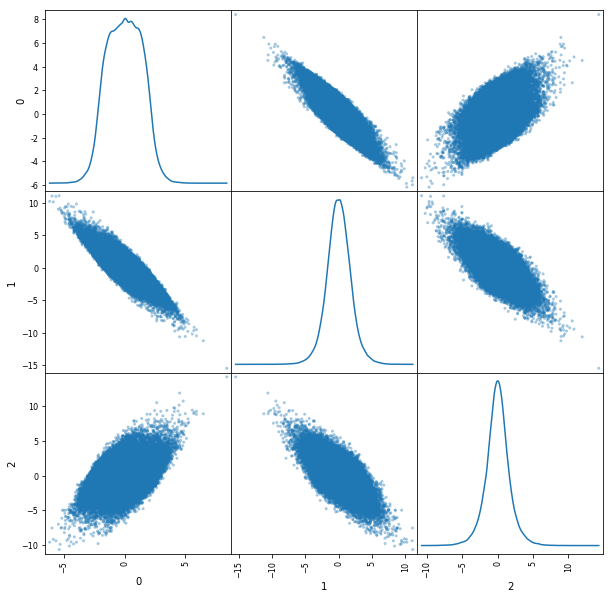

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.192,0.1318,0.9929,0
1,0.5361,0.2867,0.992,0
2,0.5356,0.5103,0.9818,0


## NPCA-RLS Algorithm

In [ ]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, beta = 0.92, runs = 1)

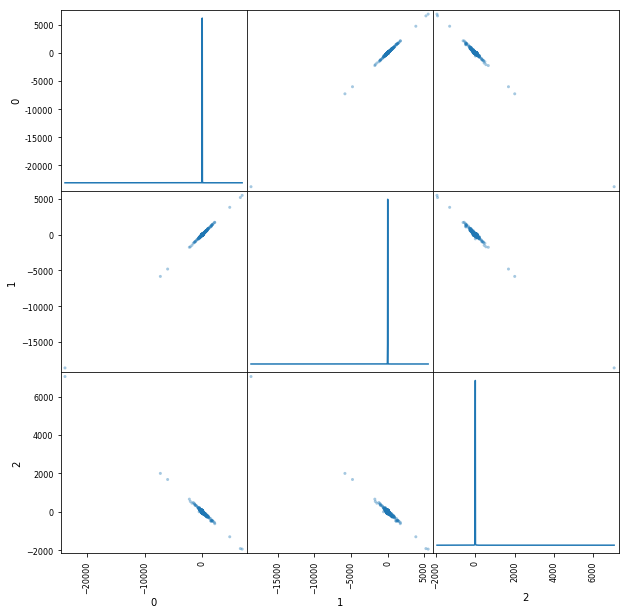

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0,0.0077,0
1,0,0,0.0085,0
2,0,0,0.0144,0


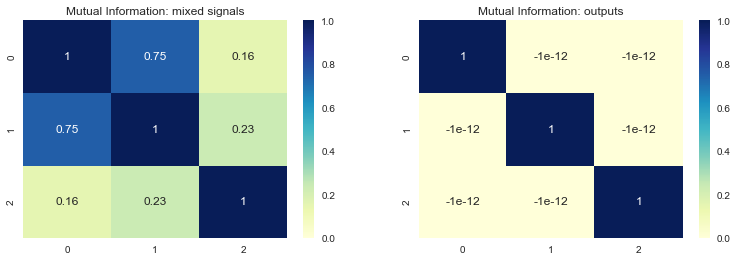

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures[-1000:], y = yNPCA[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

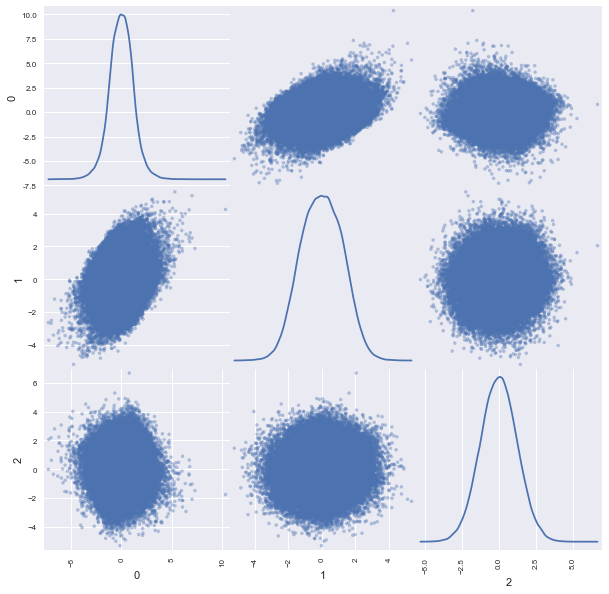

In [ ]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [ ]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures[-1000:], y = yFeedback[-1000:], KDE = True)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.5934,0.6858,0.9931,0
1,0,0.289,0.9985,7.3228e-27
2,0.129,0.0882,1,0.4124


## Chichocki-Unbehauen Algorithm Feedforward network

In [ ]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-9, runs = 1)

In [ ]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [ ]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures[-1000:], y = yFeedforward[-1000:], KDE = False)